In [21]:
import pandas as pd
import psf_library as psf
import psf_library.plotting as psfplot
import psf_library.calcs as psfcalc
import psf_library.cleaning as psf_clean

In [40]:
cpi_df = pd.read_csv("CPI.csv")

In [23]:
cpi_df.head(4)

,date,security,PX_LAST
0,2015-03-31,EHPIEU Index,-0.33
1,2015-03-31,CNCPIYOY Index,1.40
2,2015-03-31,JNCPIYOY Index,2.30
3,2015-03-31,CPI YOY Index,-0.10


In [24]:
# Prints out some useful information for us about the data frame
psf_clean.data_info(cpi_df)

Shape of the dataset: 
Columns: 3, Rows: 404

The total number of N/A values in each column: 
date        0
security    0
PX_LAST     0
dtype: int64 

The data types of each column: 
date         object
security     object
PX_LAST     float64
dtype: object 



In [25]:
# Gets the unique values for the security column
index_list = psf.unique_values(cpi_df, 'security')
index_list

['EHPIEU Index', 'CNCPIYOY Index', 'JNCPIYOY Index', 'CPI YOY Index']

In [41]:
# Prepares the dataframes for use
prepared_dataframes = psf_clean.prep_dfs(cpi_df, index_list, 'PX_LAST')
prepared_dataframes

{'S5MATR Index': Empty DataFrame
 Columns: [date, security, PX_LAST, year, quarter, quarter_year]
 Index: [],
 'S5UTIL Index': Empty DataFrame
 Columns: [date, security, PX_LAST, year, quarter, quarter_year]
 Index: []}

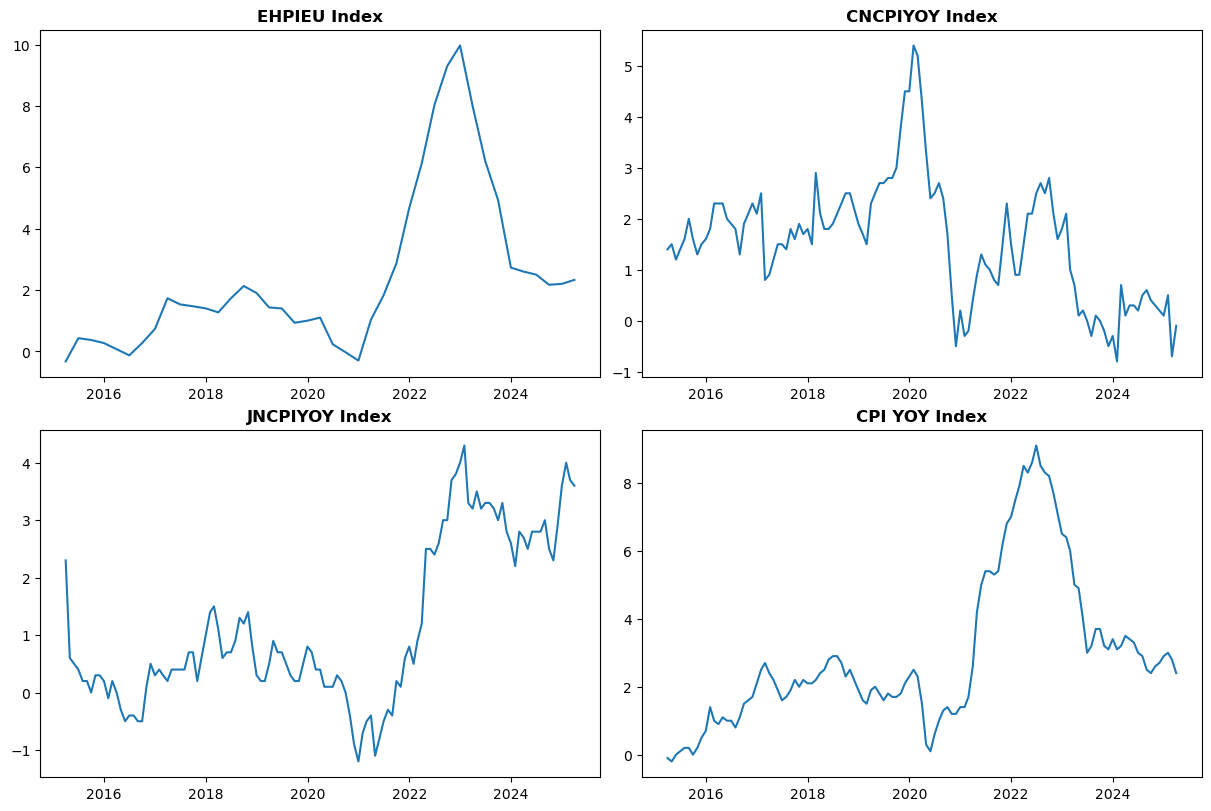

In [27]:
# Basic line plot with the simple x and y axis
fig, axes, dfs = psfplot.plot_basic_lines(index_list, prepared_dataframes, 'PX_LAST', 'date', 2, 2, (12,8))

for ax, df, index in zip(axes, dfs, index_list):
    psfplot.simple_axes(ax, index)

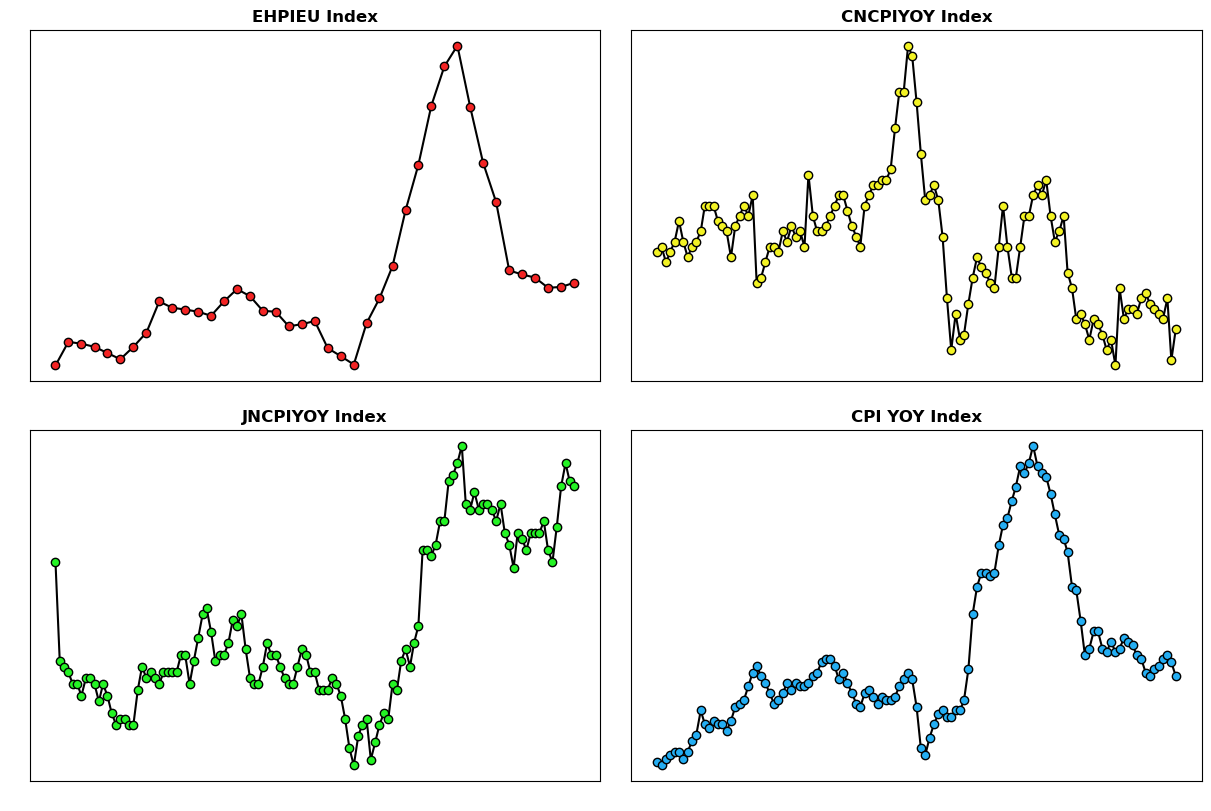

In [28]:
# Colors on the line plot along with no axes
colors = psf_clean.generate_palette('colorful', 4)
fig, axes, dfs = psfplot.plot_scatter_lines(index_list, colors, prepared_dataframes, 'PX_LAST', 'date', 2, 2, (12,8), 'o')

for ax, df, index in zip(axes, dfs, index_list):
    psfplot.style_axes_blank(ax, index)

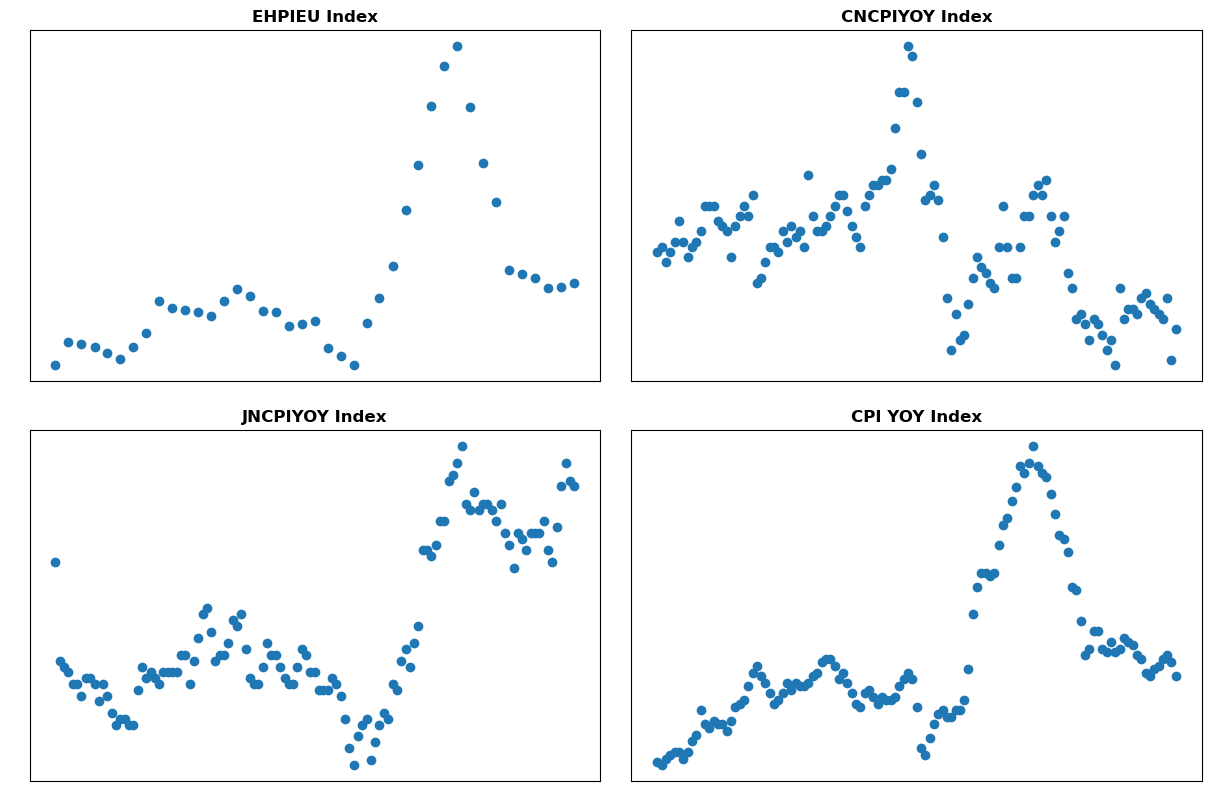

In [29]:
# Basic scatterplot
fig, axes, dfs = psfplot.plot_basic_scatter(index_list, prepared_dataframes, 'PX_LAST', 'date', 2, 2, (12,8))

for ax, df, index in zip(axes, dfs, index_list):
    psfplot.style_axes_blank(ax, index)

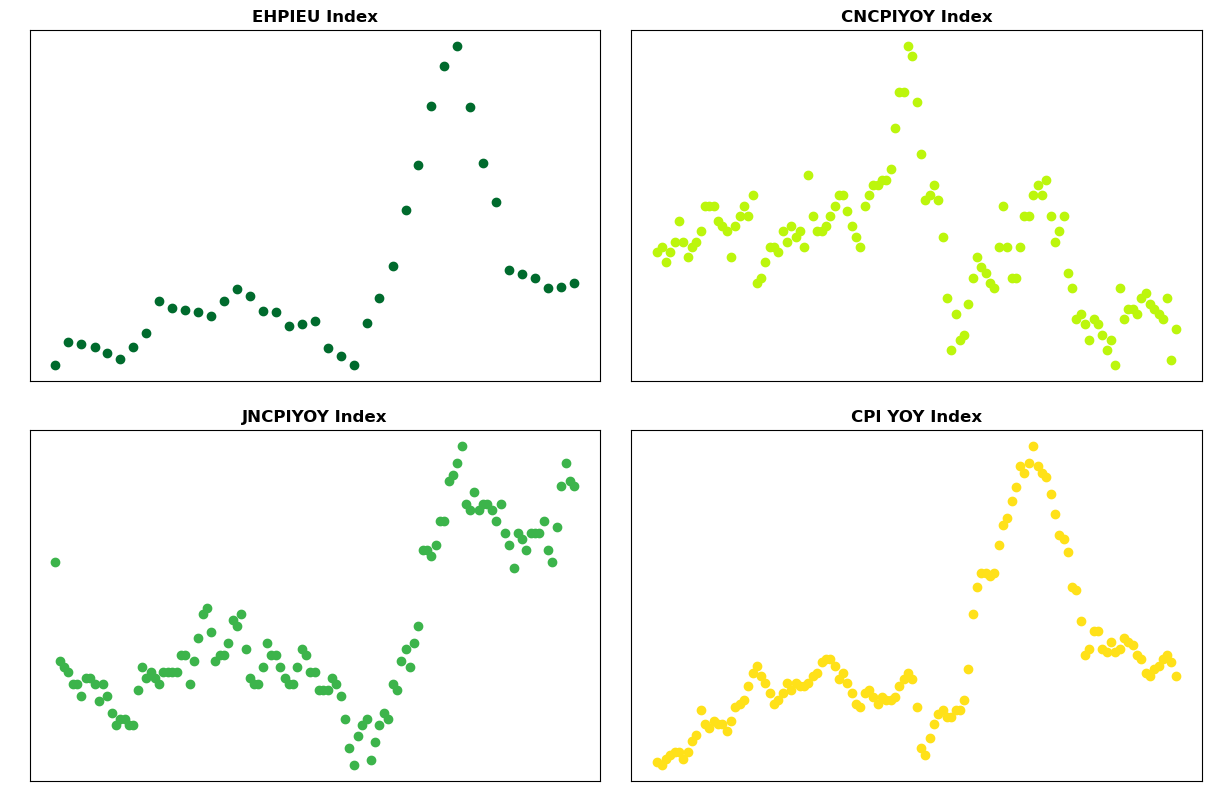

In [30]:
# Colored scatterplot
colors = psf.color_selection(4)
fig, axes, dfs = psfplot.plot_colored_scatter(index_list, colors, prepared_dataframes, 'PX_LAST', 'date', 2, 2, (12,8))

for ax, df, index in zip(axes, dfs, index_list):
    psfplot.style_axes_blank(ax, index)

In [31]:
sv_df = pd.read_csv("Sector_Valuations.csv")

In [32]:
index_list = psf_clean.unique_values(sv_df, 'security', 2)

# We want a specific title name so we created this
title_list = ['Communication Services', 'Consumer Discretionary']

# Find the mean values along with creating the tables for them
mean, tables, sv_prepared_dataframes = psf.process_indices(sv_df, index_list,'PE_RATIO', 'mean')

In [33]:
mean

{'S5MATR Index': '19.83', 'S5UTIL Index': '18.99'}

In [34]:
tables

{'S5MATR Index':     mean
 0  19.83,
 'S5UTIL Index':     mean
 0  18.99}

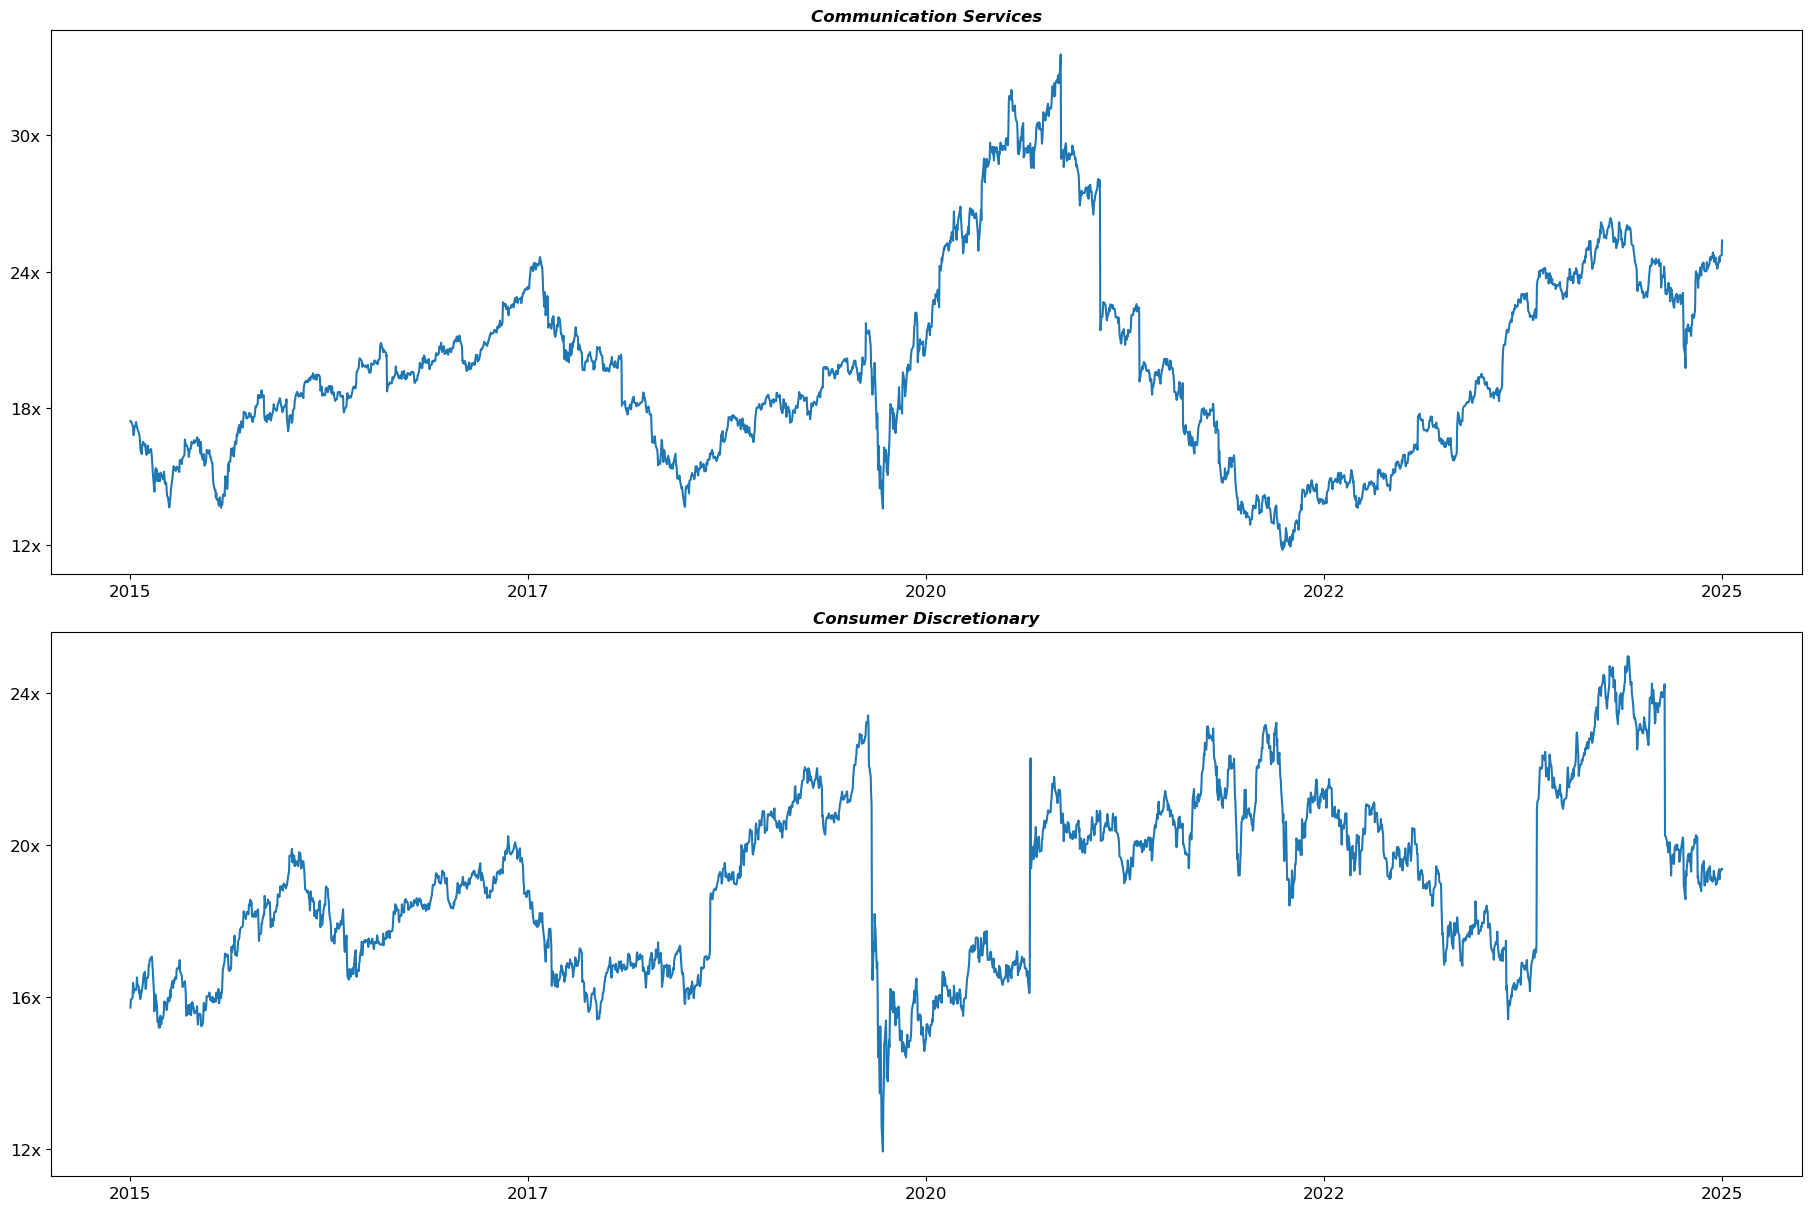

In [35]:
# Shown with the daily values as the quarterly is set to False
fig, axes, dfs = psfplot.plot_basic_lines(index_list, sv_prepared_dataframes,'PE_RATIO', 'date', 2, 1, (18,12), False)

for ax, df, title in zip(axes, dfs, title_list):
    # Uses the years along the x-axis, with a total of 5 dates, and the y-axis shown as a ratio
    psfplot.style_axes_date(ax, df, title, 'ratio', 5, '%Y')

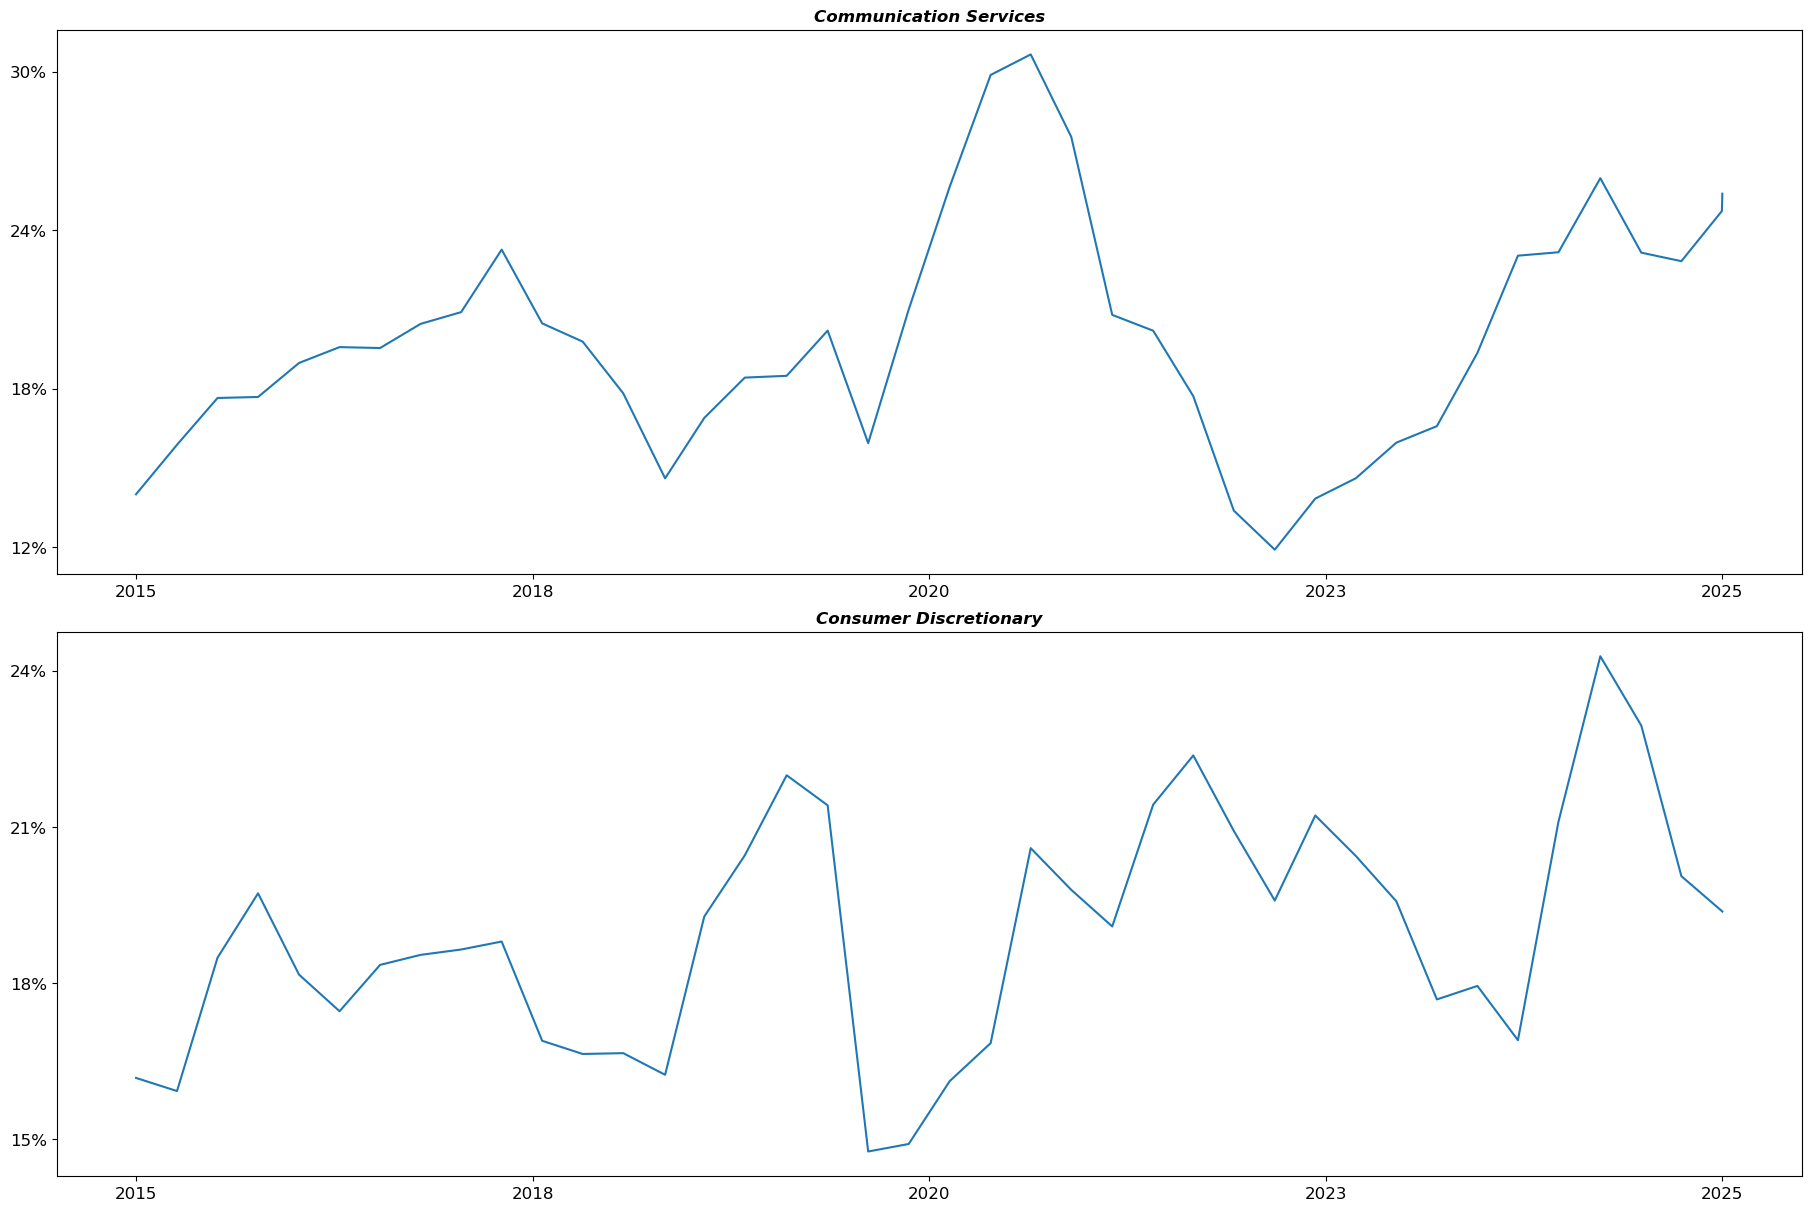

In [36]:
# Shown with the quarterly values as the quarterly is set to True
fig, axes, dfs = psfplot.plot_basic_lines(index_list, sv_prepared_dataframes,'PE_RATIO', 'date', 2, 1, (18,12), True)

for ax, df, title in zip(axes, dfs, title_list):
    # Changes the y-axis to be a percent now
    psfplot.style_axes_date(ax, df, title, 'percent', 5, '%Y')

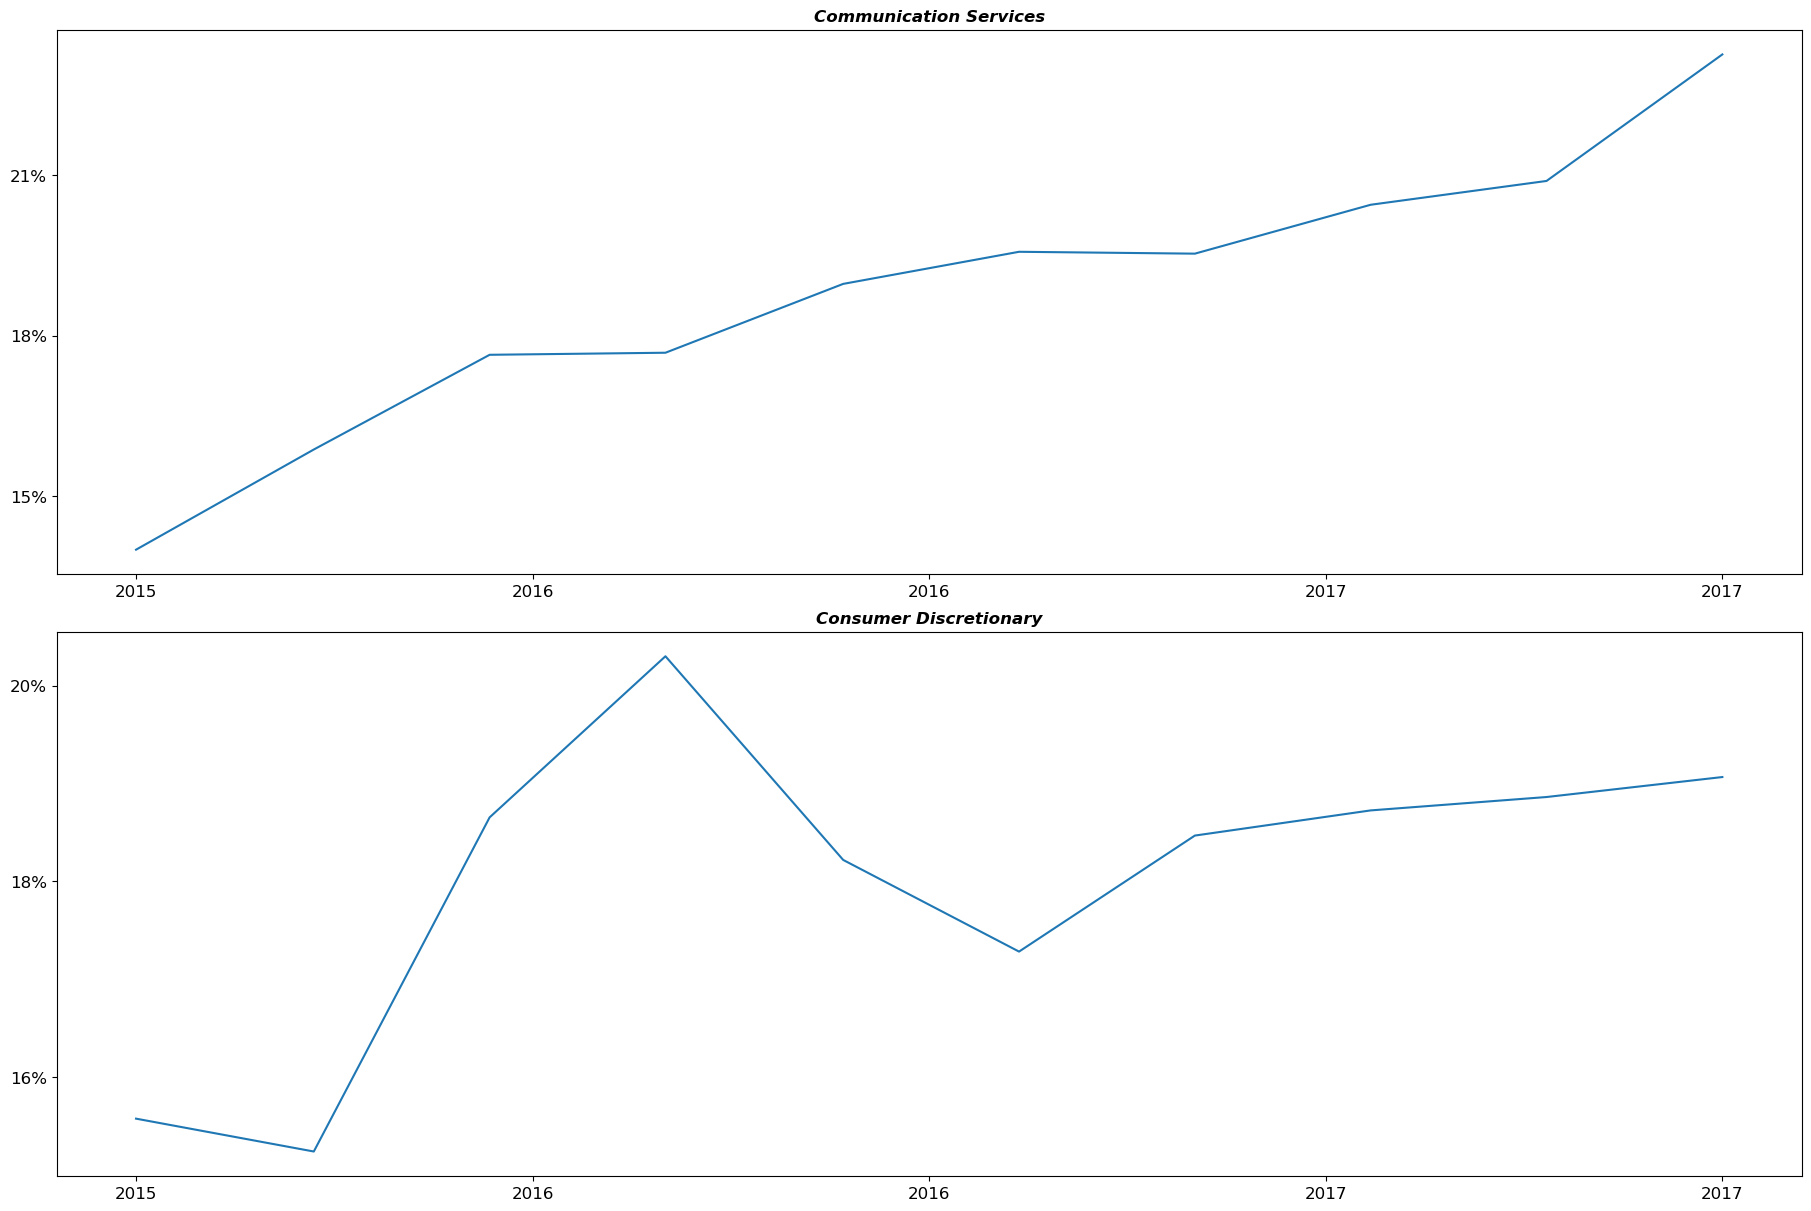

In [37]:
# Shown with the quartley values as the quarterly is set to True, and we are only looking at the first 10 values
fig, axes, dfs = psfplot.plot_basic_lines(index_list, sv_prepared_dataframes,'PE_RATIO', 'date', 2, 1, (18,12), True, 0, 10)

for ax, df, title in zip(axes, dfs, title_list):
    # Changes the y-axis to be a percent now
    psfplot.style_axes_date(ax, df, title, 'percent', 5, '%Y')

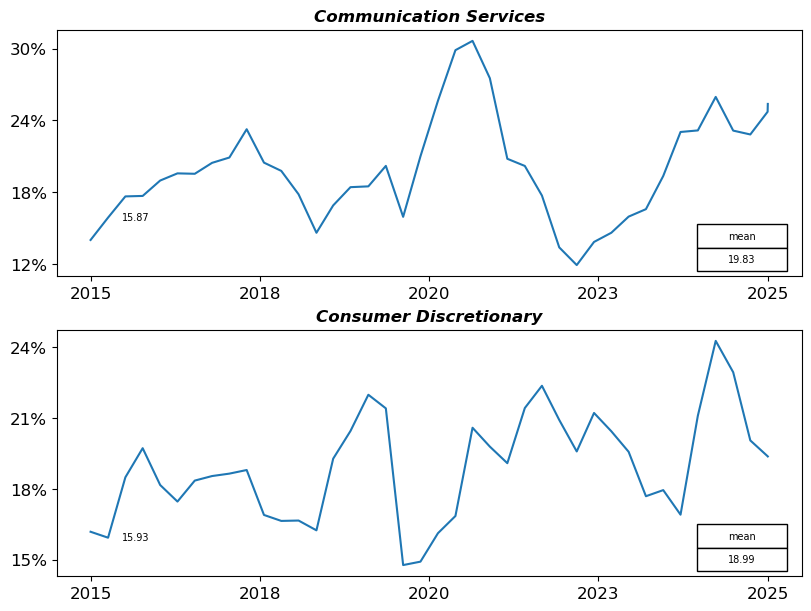

In [38]:
fig, axes, dfs = psfplot.plot_basic_lines(index_list, sv_prepared_dataframes,'PE_RATIO', 'date', 2, 1, (8,6), True)

for ax, df, title, index in zip(axes, dfs, title_list, index_list):
    psfplot.style_axes_date(ax, df, title, 'percent', 5, '%Y')
    # Plots a label on the 1st value (0 indexed), sets the location, and put the PE_RATIO as the value
    psfplot.point_label(1, df, ax, 'left', 10, -2, 'PE_RATIO', 'date')
    # Creates a table in the lower right corner, with the calculated value from the process indicies function
    psfplot.table_builder(tables[index], ax, 'lower right')